In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px

In [35]:
dff = pd.read_csv('drive/MyDrive/Dataset/data_daily.csv')
dff.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [36]:
date_col = "# Date"
dff[date_col] = pd.to_datetime(dff[date_col], infer_datetime_format = True)
dff['day'] = dff[date_col].dt.day
dff['month'] = dff[date_col].dt.month
dff['dayofweek'] = dff[date_col].dt.dayofweek
dff['dayofyear'] = dff[date_col].dt.dayofyear
dff['quarter'] = dff[date_col].dt.quarter
dff['weekofyear'] = dff[date_col].dt.weekofyear

dff.head()

<ipython-input-36-73c2ef683421>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dff['weekofyear'] = dff[date_col].dt.weekofyear


,# Date,Receipt_Count,day,month,dayofweek,dayofyear,quarter,weekofyear
0,2021-01-01,7564766,1,1,4,1,1,53
1,2021-01-02,7455524,2,1,5,2,1,53
2,2021-01-03,7095414,3,1,6,3,1,53
3,2021-01-04,7666163,4,1,0,4,1,1
4,2021-01-05,7771289,5,1,1,5,1,1


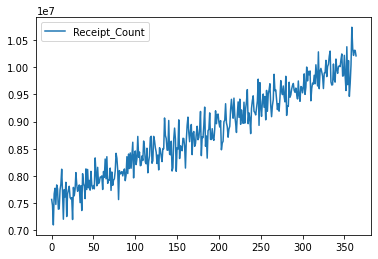

In [37]:
dff[['Receipt_Count']].plot()
pyplot.show()

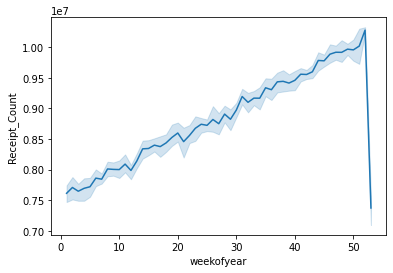

In [38]:
# plots to find the patterns

sns.lineplot(data=dff, 
             x='weekofyear', 
             y='Receipt_Count', 
            #  hue='quarter', 
             legend='full')

[[<matplotlib.axis.XTick at 0x7fab43b5daf0>,

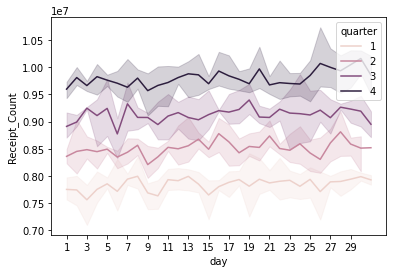

In [39]:
pl = sns.lineplot(data=dff, 
             x='day', 
             y='Receipt_Count', 
             hue='quarter', 
             legend='full')

pl.set(xticks=np.arange(1,31,2)) #, yticks=np.arange(1,10,1))

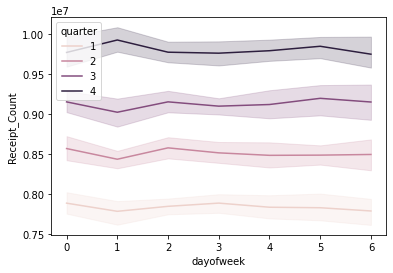

In [40]:
sns.lineplot(data=dff, 
             x='dayofweek', 
             y='Receipt_Count', 
             hue='quarter',
             legend='full')

In [41]:
df = pd.concat([dff["Receipt_Count"].shift(3), dff["Receipt_Count"].shift(2), dff["Receipt_Count"].shift(1), dff], axis=1)
df.columns = ['Receipt_Count t-3', 'Receipt_Count t-2', 'Receipt_Count t-1', '# Date',
       'Receipt_Count', 'day', 'month', 'dayofweek', 'dayofyear', 'quarter',
       'weekofyear']
df.head()

,Receipt_Count t-3,Receipt_Count t-2,Receipt_Count t-1,# Date,Receipt_Count,day,month,dayofweek,dayofyear,quarter,weekofyear
0,NaN,NaN,NaN,2021-01-01,7564766,1,1,4,1,1,53
1,NaN,NaN,7564766.0,2021-01-02,7455524,2,1,5,2,1,53
2,NaN,7564766.0,7455524.0,2021-01-03,7095414,3,1,6,3,1,53
3,7564766.0,7455524.0,7095414.0,2021-01-04,7666163,4,1,0,4,1,1
4,7455524.0,7095414.0,7666163.0,2021-01-05,7771289,5,1,1,5,1,1


In [42]:
# Rolling feature

df['rolling t-3'] = df['Receipt_Count'].rolling(3).mean()
df['rolling t-3 min'] = df['Receipt_Count'].rolling(3).min()
df['rolling t-3 max'] = df['Receipt_Count'].rolling(3).max()

df['rolling t-2'] = df['Receipt_Count'].rolling(2).mean()
df['rolling t-2 min'] = df['Receipt_Count'].rolling(2).min()
df['rolling t-2 max'] = df['Receipt_Count'].rolling(2).max()

df.head()

,Receipt_Count t-3,Receipt_Count t-2,Receipt_Count t-1,# Date,Receipt_Count,day,month,dayofweek,dayofyear,quarter,weekofyear,rolling t-3,rolling t-3 min,rolling t-3 max,rolling t-2,rolling t-2 min,rolling t-2 max
0,NaN,NaN,NaN,2021-01-01,7564766,1,1,4,1,1,53,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,7564766.0,2021-01-02,7455524,2,1,5,2,1,53,NaN,NaN,NaN,7510145.0,7455524.0,7564766.0
2,NaN,7564766.0,7455524.0,2021-01-03,7095414,3,1,6,3,1,53,7.371901e+06,7095414.0,7564766.0,7275469.0,7095414.0,7455524.0
3,7564766.0,7455524.0,7095414.0,2021-01-04,7666163,4,1,0,4,1,1,7.405700e+06,7095414.0,7666163.0,7380788.5,7095414.0,7666163.0
4,7455524.0,7095414.0,7666163.0,2021-01-05,7771289,5,1,1,5,1,1,7.510955e+06,7095414.0,7771289.0,7718726.0,7666163.0,7771289.0


In [43]:
X = df.dropna(how='any')
X.head()

,Receipt_Count t-3,Receipt_Count t-2,Receipt_Count t-1,# Date,Receipt_Count,day,month,dayofweek,dayofyear,quarter,weekofyear,rolling t-3,rolling t-3 min,rolling t-3 max,rolling t-2,rolling t-2 min,rolling t-2 max
3,7564766.0,7455524.0,7095414.0,2021-01-04,7666163,4,1,0,4,1,1,7.405700e+06,7095414.0,7666163.0,7380788.5,7095414.0,7666163.0
4,7455524.0,7095414.0,7666163.0,2021-01-05,7771289,5,1,1,5,1,1,7.510955e+06,7095414.0,7771289.0,7718726.0,7666163.0,7771289.0
5,7095414.0,7666163.0,7771289.0,2021-01-06,7473320,6,1,2,6,1,1,7.636924e+06,7473320.0,7771289.0,7622304.5,7473320.0,7771289.0
6,7666163.0,7771289.0,7473320.0,2021-01-07,7832624,7,1,3,7,1,1,7.692411e+06,7473320.0,7832624.0,7652972.0,7473320.0,7832624.0
7,7771289.0,7473320.0,7832624.0,2021-01-08,7765028,8,1,4,8,1,1,7.690324e+06,7473320.0,7832624.0,7798826.0,7765028.0,7832624.0


In [44]:
X.shape

(362, 17)

In [45]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X[['Receipt_Count t-3', 'Receipt_Count t-2', 'Receipt_Count t-1']], 
#                                                       #  'rolling t-3', 'rolling t-2']],
#                                                      X['Receipt_Count'], 
#                                                     test_size=0.30, random_state=42)

# from sklearn.linear_model import LinearRegression

# # Fit a linear regression model on the training set
# model = LinearRegression().fit(X_train, y_train)
# predictions = model.predict(X_test)

# from sklearn.metrics import mean_squared_error, r2_score

# rms = mean_squared_error(y_test, predictions, squared=False)
# print("RMSE: ", rms)
# r2 = r2_score(y_test, predictions)
# print("R2:", r2)


In [46]:
# # plot
# pyplot.plot(y_test)
# pyplot.plot(predictions, color='yellow')
# pyplot.show()

In [47]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print(tf.__version__)

2.9.2


In [63]:
model1 = Sequential()
model1.add(Dense(7, input_shape=(7,), kernel_initializer='normal', activation='relu'))
model1.add(Dense(64, kernel_initializer='normal', activation='relu'))
model1.add(Dense(128, kernel_initializer='normal', activation='relu'))
model1.add(Dense(64, kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, kernel_initializer='normal'))

In [64]:
model1.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))

In [65]:
%%time
history = model1.fit(
    X[['Receipt_Count t-3', 'Receipt_Count t-2', 'Receipt_Count t-1', 'rolling t-3', 'rolling t-2', 'day', 'month']],
    # X[['day', 'month', 'dayofweek', 'dayofyear', 'quarter', 'weekofyear']], # shit features
    X['Receipt_Count'],
    validation_split=0.2,
    verbose=1, epochs=75)

Epoch 1/75
10/10 [==============================] - 1s 20ms/step - loss: 8573892.0000 - val_loss: 9870540.0000
Epoch 2/75
10/10 [==============================] - 0s 5ms/step - loss: 8569287.0000 - val_loss: 9865426.0000
Epoch 3/75
10/10 [==============================] - 0s 5ms/step - loss: 8564682.0000 - val_loss: 9859603.0000
Epoch 4/75
10/10 [==============================] - 0s 5ms/step - loss: 8559208.0000 - val_loss: 9852395.0000
Epoch 5/75
10/10 [==============================] - 0s 7ms/step - loss: 8552373.0000 - val_loss: 9843618.0000
Epoch 6/75
10/10 [==============================] - 0s 7ms/step - loss: 8544029.0000 - val_loss: 9832485.0000
Epoch 7/75
10/10 [==============================] - 0s 5ms/step - loss: 8533197.0000 - val_loss: 9817722.0000
Epoch 8/75
10/10 [==============================] - 0s 7ms/step - loss: 8518715.0000 - val_loss: 9797956.0000
Epoch 9/75
10/10 [==============================] - 0s 5ms/step - loss: 8499392.0000 - val_loss: 9771466.0000
Epoch 10/

In [66]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error pattern')
  plt.legend()
  plt.grid(True)

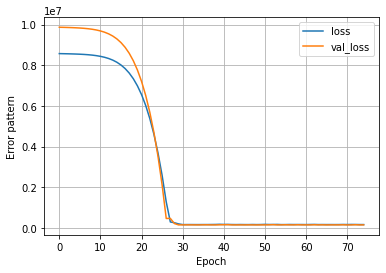

In [67]:
plot_loss(history)

In [70]:
model1.save('drive/MyDrive/Dataset/Models/fetch1.h5')

In [54]:
# new_model = tf.keras.models.load_model('my_model.h5')

In [61]:
X.tail()

,Receipt_Count t-3,Receipt_Count t-2,Receipt_Count t-1,# Date,Receipt_Count,day,month,dayofweek,dayofyear,quarter,weekofyear,rolling t-3,rolling t-3 min,rolling t-3 max,rolling t-2,rolling t-2 min,rolling t-2 max
360,9703857.0,10045897.0,10738865.0,2021-12-27,10350408,27,12,0,361,4,52,1.037839e+07,10045897.0,10738865.0,10544636.5,10350408.0,10738865.0
361,10045897.0,10738865.0,10350408.0,2021-12-28,10219445,28,12,1,362,4,52,1.043624e+07,10219445.0,10738865.0,10284926.5,10219445.0,10350408.0
362,10738865.0,10350408.0,10219445.0,2021-12-29,10313337,29,12,2,363,4,52,1.029440e+07,10219445.0,10350408.0,10266391.0,10219445.0,10313337.0
363,10350408.0,10219445.0,10313337.0,2021-12-30,10310644,30,12,3,364,4,52,1.028114e+07,10219445.0,10313337.0,10311990.5,10310644.0,10313337.0
364,10219445.0,10313337.0,10310644.0,2021-12-31,10211187,31,12,4,365,4,52,1.027839e+07,10211187.0,10313337.0,10260915.5,10211187.0,10310644.0
